In [1]:
"""A look at Hipparcos-Gaia catalog by T. Brandt"""
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords

import gapipes as gp
import kinesis as kn

In [2]:
t = Table.read("/home/soh/data/brandt_hipparcos_gaia/HGCA_vDR2_corrected.fits")

In [5]:
t.colnames

['hip_id',
 'gaia_source_id',
 'gaia_ra',
 'gaia_dec',
 'radial_velocity',
 'radial_velocity_error',
 'radial_velocity_source',
 'parallax_gaia',
 'parallax_gaia_error',
 'pmra_gaia',
 'pmdec_gaia',
 'pmra_gaia_error',
 'pmdec_gaia_error',
 'pmra_pmdec_gaia',
 'pmra_hg',
 'pmdec_hg',
 'pmra_hg_error',
 'pmdec_hg_error',
 'pmra_pmdec_hg',
 'pmra_hip',
 'pmdec_hip',
 'pmra_hip_error',
 'pmdec_hip_error',
 'pmra_pmdec_hip',
 'epoch_ra_gaia',
 'epoch_dec_gaia',
 'epoch_ra_hip',
 'epoch_dec_hip',
 'crosscal_pmra_hip',
 'crosscal_pmdec_hip',
 'crosscal_pmra_hg',
 'crosscal_pmdec_hg',
 'nonlinear_dpmra',
 'nonlinear_dpmdec']

In [6]:
print("{:d} rows".format(len(t)))

115663 rows


In [3]:
hg = t.to_pandas()
hg.head()

,hip_id,gaia_source_id,gaia_ra,gaia_dec,radial_velocity,radial_velocity_error,radial_velocity_source,parallax_gaia,parallax_gaia_error,pmra_gaia,...,epoch_ra_gaia,epoch_dec_gaia,epoch_ra_hip,epoch_dec_hip,crosscal_pmra_hip,crosscal_pmdec_hip,crosscal_pmra_hg,crosscal_pmdec_hg,nonlinear_dpmra,nonlinear_dpmdec
0,1,2738327528519591936,0.000872,1.088979,8.260943,0.264233,b'Gaia_DR2',5.432988,0.060613,-0.656125,...,2015.602116,2015.370208,1991.551294,1991.275083,-0.168654,0.284637,-0.107510,0.097344,6.544803e-06,0.000006
1,2,2341871673090078592,0.005087,-19.498840,NaN,NaN,b'None',25.120768,0.319277,163.520340,...,2015.365796,2015.375835,1991.471657,1991.423366,-0.215981,0.369768,-0.105511,0.113484,1.573401e-06,0.000677
2,3,2881742980523997824,0.005059,38.859269,0.000000,4.200000,b'XHIP',2.889209,0.075184,5.939648,...,2015.749445,2015.646277,1990.849412,1991.049844,-0.074981,0.323018,0.045580,0.102365,-6.918422e-07,-0.000002
3,4,4973386040722654336,0.009061,-51.893537,NaN,NaN,b'None',7.329419,0.036094,61.799679,...,2015.601347,2015.578224,1991.011733,1991.180826,-0.015010,0.323483,-0.078017,0.110980,-6.113603e-06,0.000290
4,5,2305974989264598272,0.009974,-40.591166,20.197311,0.174826,b'Gaia_DR2',2.560365,0.056405,0.967055,...,2015.960607,2015.344691,1991.098048,1991.479839,-0.177676,0.073271,-0.077208,0.081199,-1.753704e-06,-0.000011


In [11]:
hg[['hip_id', 'gaia_source_id', 'pmra_hip', 'pmra_hg', 'pmra_gaia']].head()

,hip_id,gaia_source_id,pmra_hip,pmra_hg,pmra_gaia
0,1,2738327528519591936,-5.015876,-6.006098,-0.656125
1,2,2341871673090078592,183.116516,181.367004,163.520340
2,3,2881742980523997824,4.570159,5.811018,5.939648
3,4,4973386040722654336,62.694077,61.911324,61.799679
4,5,2305974989264598272,1.839309,0.915046,0.967055


In [5]:
gdr2 = gp.gaia.query_sourceid(hg[['gaia_source_id']].head(100), 'gaia_source_id')

In [8]:
top100_merged = hg[['hip_id', 'gaia_source_id', 'pmra_gaia', 'pmra_gaia_error', 'pmra_pmdec_gaia']].head(100)\
    .merge(gdr2[['source_id', 'pmra', 'pmra_error', 'pmra_pmdec_corr']], left_on='gaia_source_id', right_on='source_id')

In [12]:
top100_merged[['pmra_gaia_error', 'pmra_error']].head()

,pmra_gaia_error,pmra_error
0,0.176379,0.114490
1,0.798096,0.498232
2,0.141411,0.080281
3,0.071697,0.040128
4,0.097043,0.058752


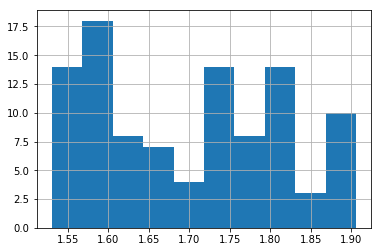

In [14]:
(top100_merged['pmra_gaia_error']/top100_merged['pmra_error']).hist()

In [6]:
dr2hy = pd.read_csv("/Users/semyeong/projects/spelunky/oh17-dr2/dr2_vL_clusters_full.csv")\
    .groupby('cluster').get_group('Hyades')

In [13]:
merged = dr2hy[['source_id']].merge(hg, left_on='source_id', right_on='gaia_source_id')
print(len(merged), len(dr2hy))

116 515


In [17]:
hg.columns[hg.columns.str.contains('error')]

Index(['radial_velocity_error', 'parallax_gaia_error', 'pmra_gaia_error',
       'pmdec_gaia_error', 'pmra_hg_error', 'pmdec_hg_error', 'pmra_hip_error',
       'pmdec_hip_error'],
      dtype='object')

In [19]:
hg[['pmra_gaia_error', 'pmra_hg_error', 'pmra_hip_error']].describe()

,pmra_gaia_error,pmra_hg_error,pmra_hip_error
count,115663.000000,115663.000000,115663.000000
mean,0.205895,0.051429,1.243846
std,0.313539,1.761634,6.905654
min,0.035714,0.012242,0.290032
25%,0.098864,0.025313,0.701109
50%,0.131165,0.032535,0.935782
75%,0.176812,0.043777,1.297568
max,4.319538,589.754089,2263.550781


In [20]:
merged[['pmra_gaia_error', 'pmra_hg_error', 'pmra_hip_error']].describe()

,pmra_gaia_error,pmra_hg_error,pmra_hip_error
count,116.000000,116.000000,116.000000
mean,0.356149,0.046424,1.442794
std,0.349809,0.024232,0.840010
min,0.108887,0.021203,0.550761
25%,0.160801,0.027865,0.832959
50%,0.210200,0.036889,1.190504
75%,0.341849,0.057524,1.756173
max,1.672062,0.132329,5.007300


In [21]:
import seaborn as sns

In [27]:
plt.style.use('smoh')

Text(0.5, 0, 'error [mas/yr]')

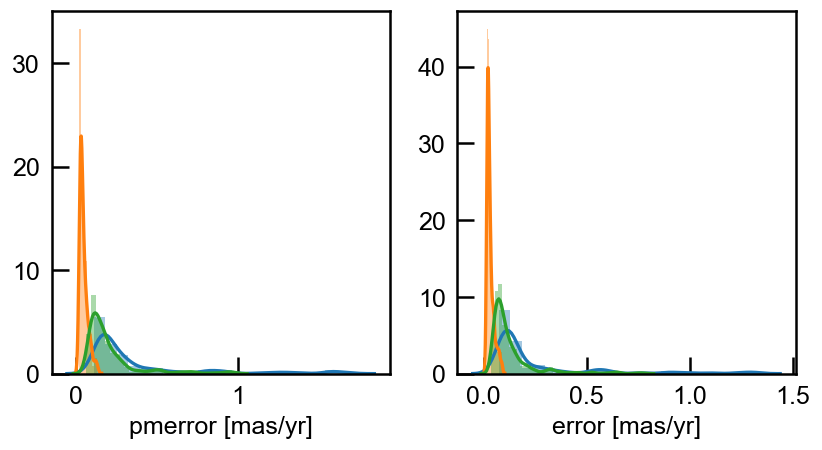

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.sca(ax[0])
sns.distplot(merged['pmra_gaia_error'].values);
sns.distplot(merged['pmra_hg_error'].values);
sns.distplot(dr2hy['pmra_error'].values)
plt.xlabel('pmerror [mas/yr]')
plt.sca(ax[1])
sns.distplot(merged['pmdec_gaia_error'].values);
sns.distplot(merged['pmdec_hg_error'].values);
sns.distplot(dr2hy['pmdec_error'].values)
plt.xlabel('error [mas/yr]')

In [ ]:
g.plot_joint()

In [42]:
dr2hy['pmra_error'].describe()

count    515.000000
mean       0.205516
std        0.163796
min        0.063822
25%        0.109419
50%        0.153356
75%        0.228624
max        0.972919
Name: pmra_error, dtype: float64

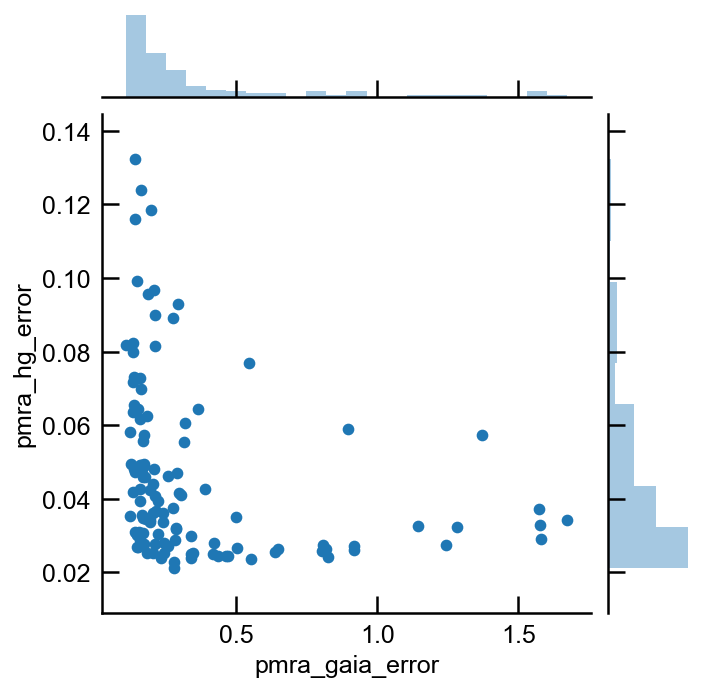

In [41]:
g = sns.jointplot('pmra_gaia_error', 'pmra_hg_error', data=merged)
# g.plot_joint('pmra_hg_error', 'pmdec_hg_error', data=merged)